# EDA FOR RETAIL SALES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
df = pd.read_csv('retail_sales_dataset.csv')

In [13]:
# Check for Missing values
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [14]:
df.dtypes

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

In [15]:
df.duplicated().sum()

np.int64(0)

In [3]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
# Basics statistics
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [5]:
df['Gender'].value_counts()

Gender
Female    510
Male      490
Name: count, dtype: int64

In [17]:
df['Age'].min(), df['Age'].max()

(18, 64)

In [7]:
df['Product Category'].value_counts()

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

In [8]:
df['Date'].min(), df['Date'].max()

('2023-01-01', '2024-01-01')

In [18]:


# Define your bins and labels
bins = [10, 20, 30, 40, 50, 60, 70]
labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69']

# Create the AgeGroup column
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Count the number of customers in each age group
age_group_counts = df['AgeGroup'].value_counts().sort_index()

print(age_group_counts)

# Identify the majority age group
majority_age_group = age_group_counts.idxmax()
majority_count = age_group_counts.max()
print(f"The majority of customers are in the age range: {majority_age_group} ({majority_count} customers)")

AgeGroup
10-19     42
20-29    209
30-39    191
40-49    222
50-59    221
60-69    115
Name: count, dtype: int64
The majority of customers are in the age range: 40-49 (222 customers)


In [19]:
print(df[df['Total Amount'] > df['Total Amount'].quantile(0.95)])  # Top 5% transactions

     Transaction ID       Date Customer ID  Gender  Age Product Category  \
14               15 2023-01-16     CUST015  Female   42      Electronics   
64               65 2023-12-05     CUST065    Male   51      Electronics   
71               72 2023-05-23     CUST072  Female   20      Electronics   
73               74 2023-11-22     CUST074  Female   18           Beauty   
88               89 2023-10-01     CUST089  Female   55      Electronics   
92               93 2023-07-14     CUST093  Female   35           Beauty   
108             109 2023-10-18     CUST109  Female   34      Electronics   
117             118 2023-05-16     CUST118  Female   30      Electronics   
123             124 2023-10-27     CUST124    Male   33         Clothing   
138             139 2023-12-15     CUST139    Male   36           Beauty   
151             152 2023-02-28     CUST152    Male   43      Electronics   
154             155 2023-05-17     CUST155    Male   31      Electronics   
156         

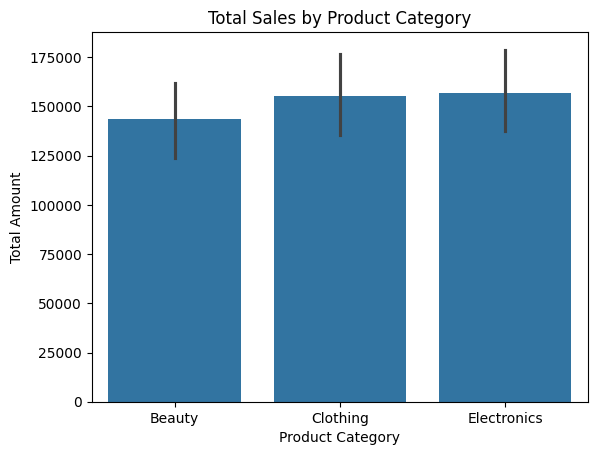

In [9]:
# Plot total sales by category
sns.barplot(x='Product Category', y='Total Amount', data=df, estimator=sum)
plt.title('Total Sales by Product Category')
plt.show()

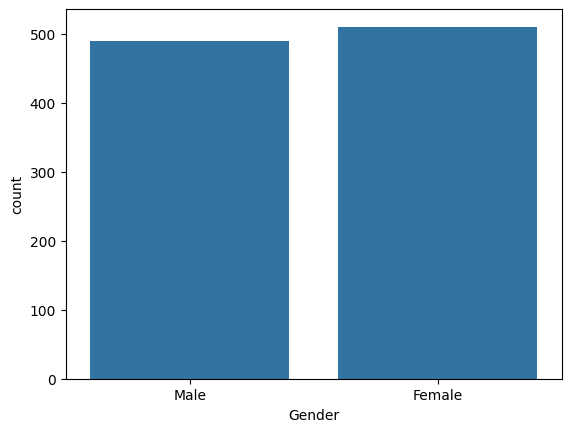

In [10]:
# Plot gender distribution
sns.countplot(x='Gender', data=df)
plt.show()

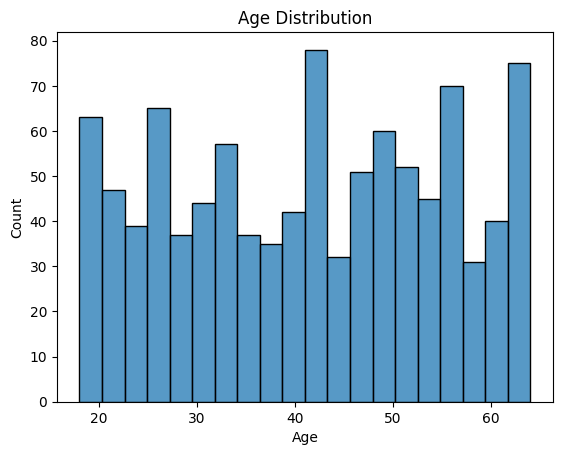

In [11]:
# # Age distribution
sns.histplot(df['Age'], bins = 20)
plt.title('Age Distribution')
plt.show()

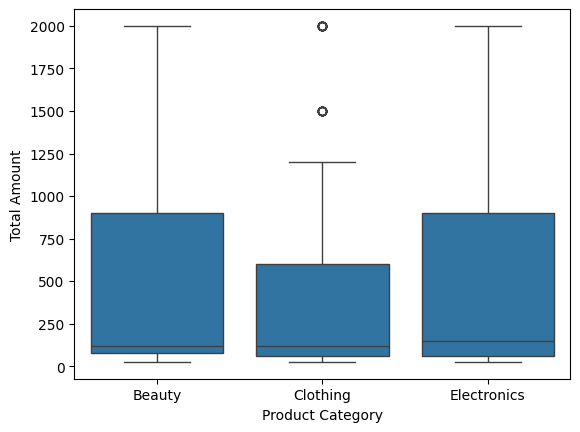

In [12]:
# Boxplot: Total Amount by Product Category
sns.boxplot(x='Product Category', y='Total Amount', data=df)
plt.show()

#  Time Series Analysis

C:\Users\Prince\AppData\Local\Temp\ipykernel_29192\3638468787.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Date')['Total Amount'].sum()


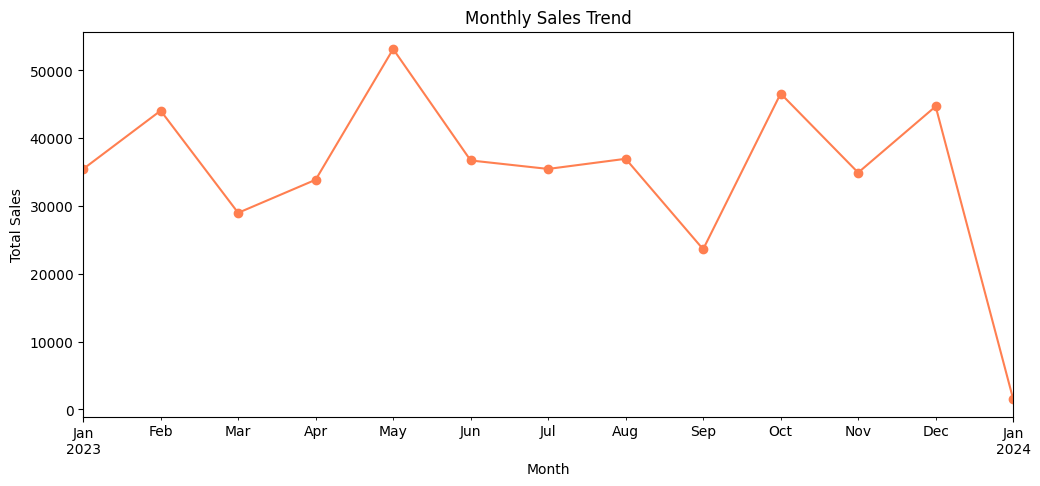

In [16]:
df['Date'] = pd.to_datetime(df['Date'])
monthly_sales = df.resample('M', on='Date')['Total Amount'].sum()
monthly_sales.plot(marker='o', figsize=(12,5), color='coral')
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.show()